c:\Users\wjsrh\Desktop\전광민\01.MicroSoft_Bootcamp\9-1. 실습\notebooks\DL3_20241006
c:\Users\wjsrh\Desktop\전광민\01.MicroSoft_Bootcamp\9-1. 실습\notebooks
train loss:2.3011475514262933
=== epoch:1, train acc:0.14, test acc:0.1328 ===
train loss:2.3069096161756515
train loss:2.3014717517925187
train loss:2.298564814578238
=== epoch:2, train acc:0.14333333333333334, test acc:0.1308 ===
train loss:2.309866844922085
train loss:2.3059950122461017
train loss:2.3005626119035982
=== epoch:3, train acc:0.14333333333333334, test acc:0.1367 ===
train loss:2.30308780268602
train loss:2.3034794877744407
train loss:2.3022059984770875
=== epoch:4, train acc:0.13333333333333333, test acc:0.1354 ===
train loss:2.30001801988258
train loss:2.3065404459365353
train loss:2.311907286236271
=== epoch:5, train acc:0.14333333333333334, test acc:0.1397 ===
train loss:2.2963958901798076
train loss:2.300352466373885
train loss:2.306900730616242
=== epoch:6, train acc:0.14333333333333334, test acc:0.1379 ===
train loss:2.

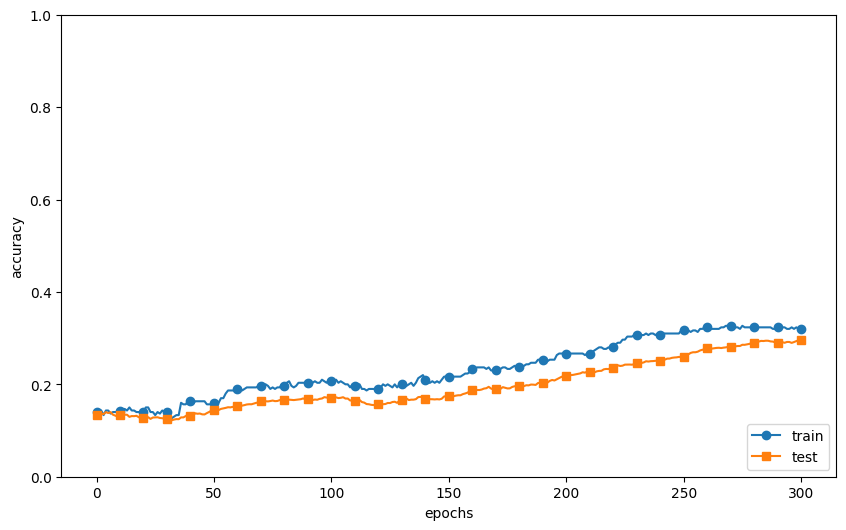

In [4]:
import os, sys
print(os.getcwd())
current_dir = os.path.dirname(os.getcwd())
print(current_dir)
os.chdir(current_dir)


import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:300]
t_train = t_train[:300]

use_dropout = True
dropout_ratio = 0.3

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100,100,100,100,100,100], output_size=10,
                              use_dropout= use_dropout, dropout_ration= dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test, epochs=301,
                  mini_batch_size=100, optimizer='sgd', optimizer_param={'lr':0.01}, verbose=True)

trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list


markers = {"train": "o", "test": "s"}
x = np.arange(len(train_acc_list))
plt.figure(figsize=(10, 6))
plt.plot(x, train_acc_list, marker='o', label='train', markevery= 10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery= 10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0) 
plt.legend(loc='lower right')
plt.show()